# AI-Powered Job Market Insights

### Selected Trend, Factors, and Geographical Scale

For my project, I have chosen to investigate the impact of artificial intelligence (AI) on the global job market. This study focuses on how AI adoption influences employment trends across various industries. The key socioeconomic factors examined include automation risk, job growth projections, and wage disparities. The geographical scale of the project is worldwide, allowing for cross-country comparisons and a comprehensive view of how different regions are affected.

Dataset Overview:
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2       

C:\Users\athar\AppData\Local\Temp\ipykernel_10572\1322790537.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


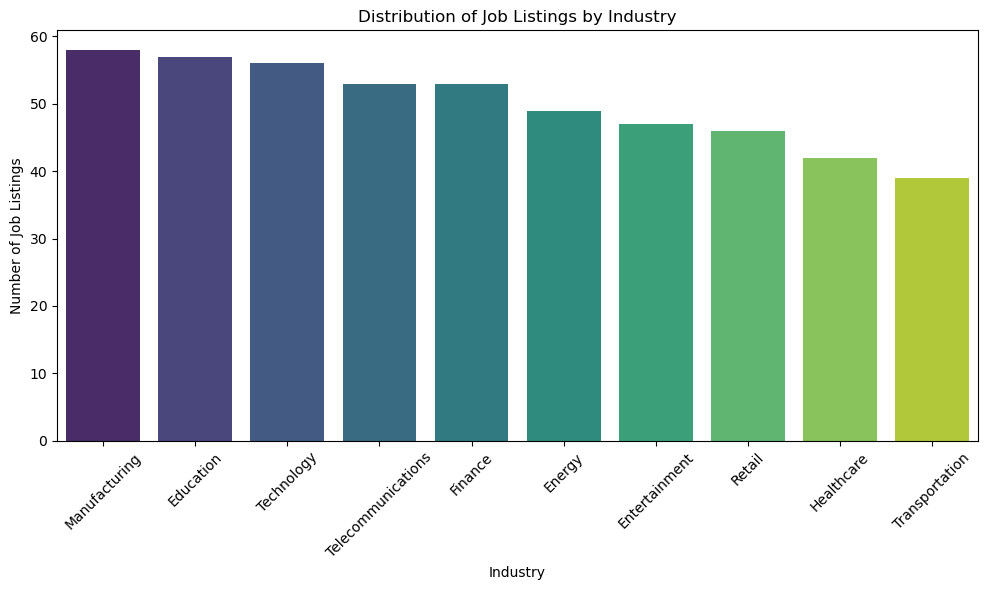

Job Listings by AI Adoption Level:
AI_Adoption_Level
Medium    179
Low       174
High      147
Name: count, dtype: int64


C:\Users\athar\AppData\Local\Temp\ipykernel_10572\1322790537.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ai_counts.index, y=ai_counts.values, palette="coolwarm")


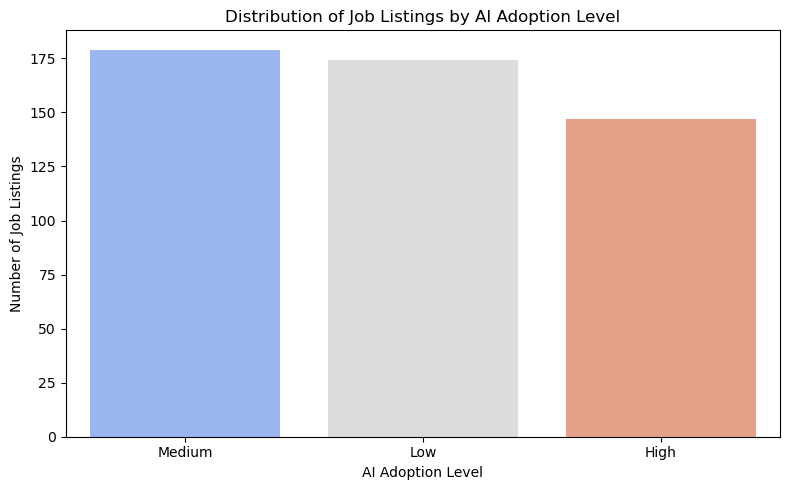

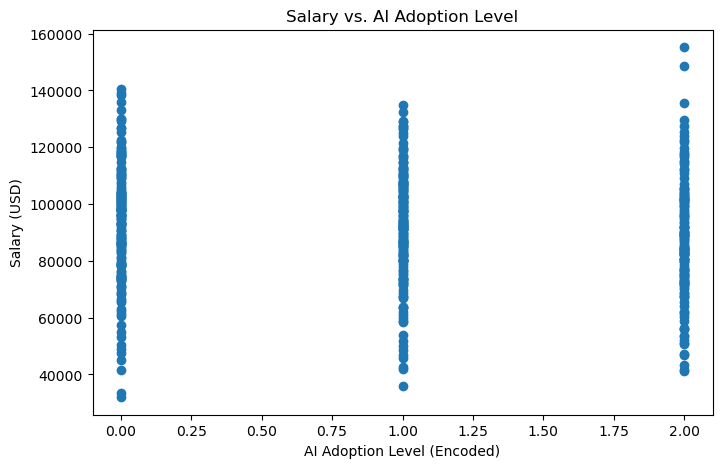

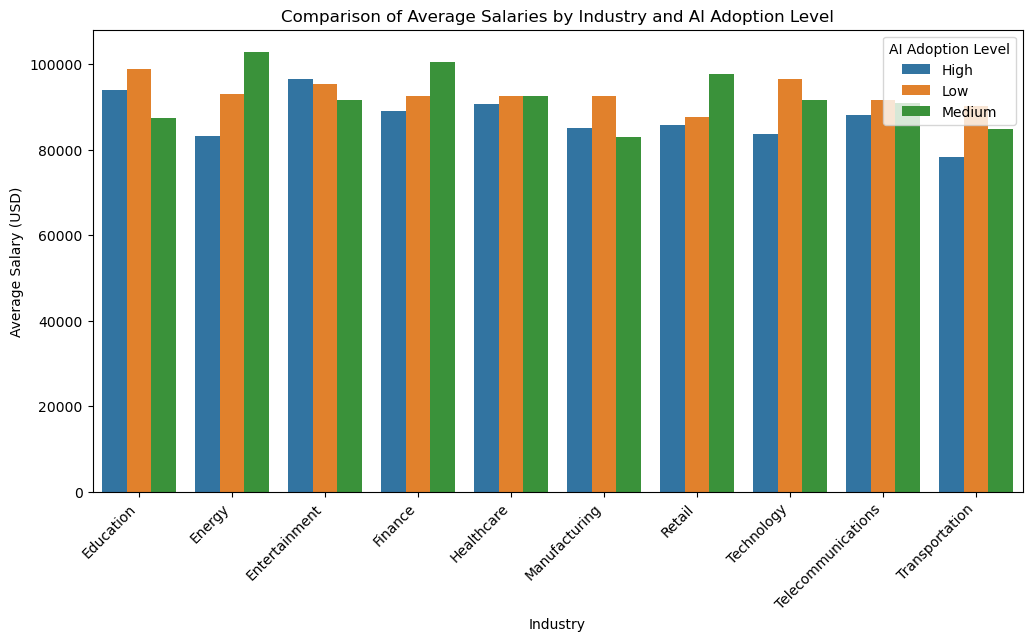

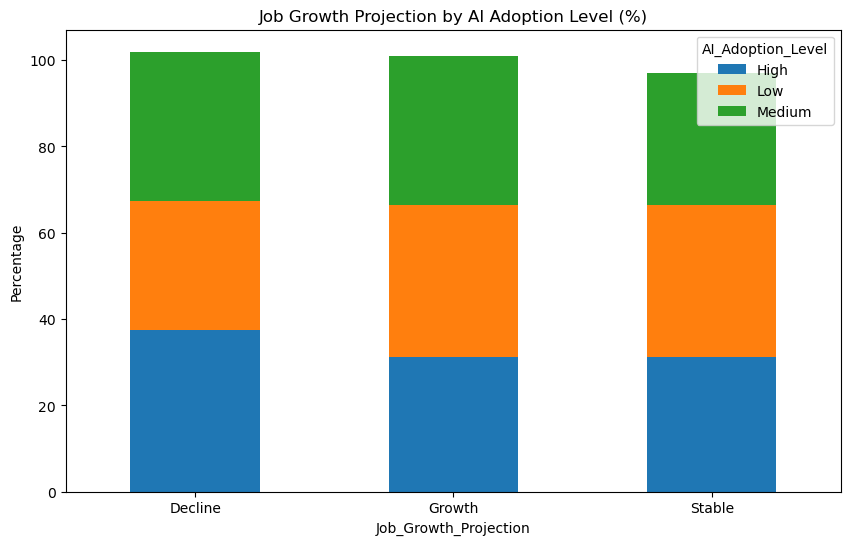

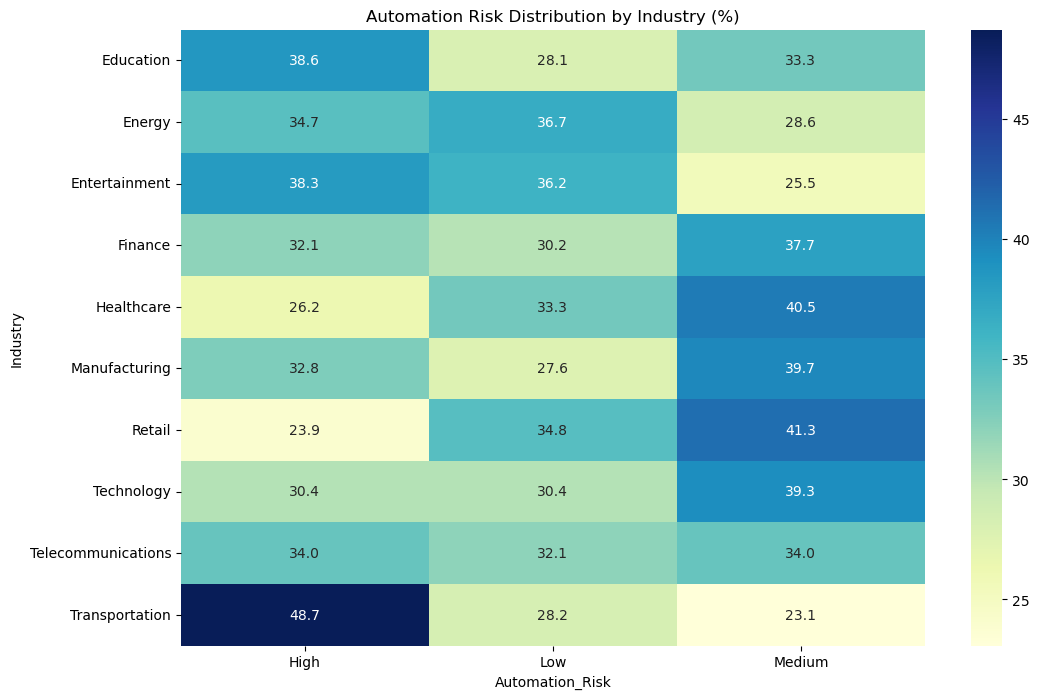

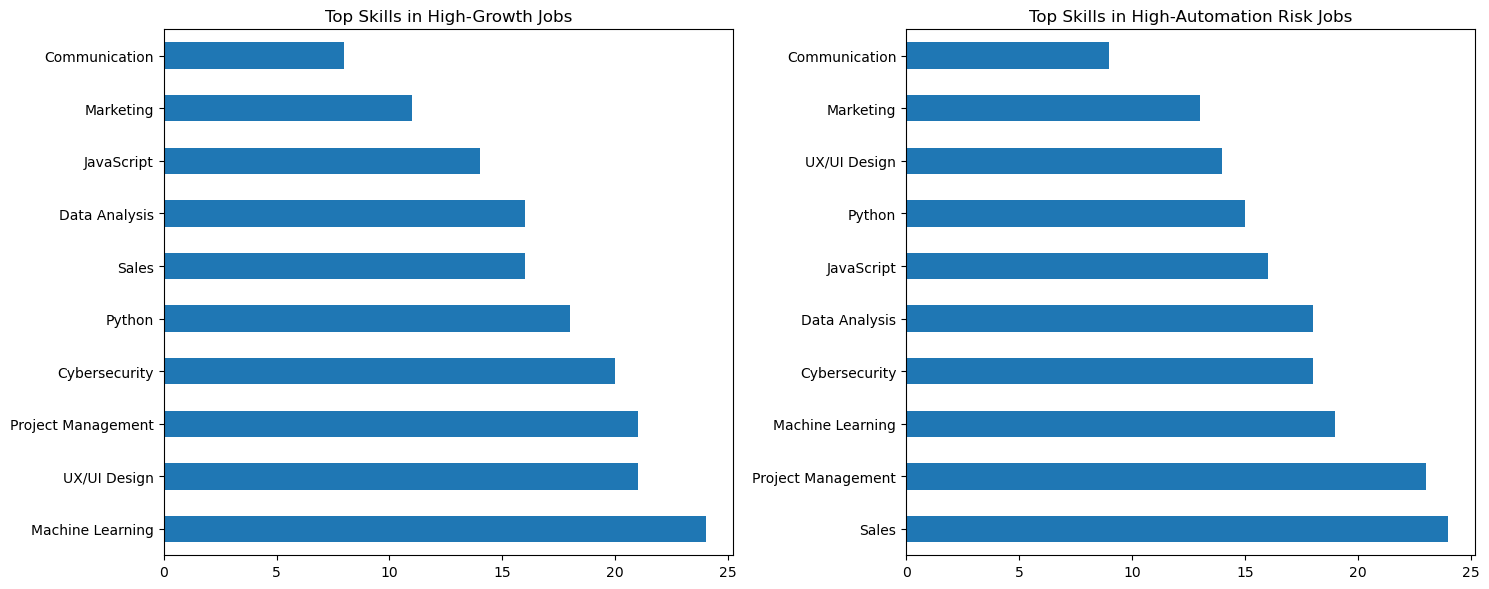

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ai_job_market_insights.csv')
print("Dataset Overview:")
print(df.head())
print(df.info())

# Job Listings by Industry
industry_counts = df['Industry'].value_counts()
print("Job Listings by Industry:")
print(industry_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")
plt.title("Distribution of Job Listings by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Job Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Job Listings by AI Adoption Level
ai_counts = df['AI_Adoption_Level'].value_counts()
print("Job Listings by AI Adoption Level:")
print(ai_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=ai_counts.index, y=ai_counts.values, palette="coolwarm")
plt.title("Distribution of Job Listings by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Number of Job Listings")
plt.tight_layout()
plt.show()

# ordinal encoding for AI Adoption Level
ai_adoption_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
temp = df['AI_Adoption_Level'].map(ai_adoption_mapping)

# Salary vs. AI Adoption Level (if converted to an ordinal scale)
plt.figure(figsize=(8,5))
plt.scatter(temp, df['Salary_USD'])
plt.xlabel('AI Adoption Level (Encoded)')
plt.ylabel('Salary (USD)')
plt.title('Salary vs. AI Adoption Level')
plt.show()

# Group by Industry and AI Adoption Level, then compute the average salary
grouped_salary = df.groupby(['Industry', 'AI_Adoption_Level'])['Salary_USD'].mean().reset_index()
# Average salaries across industries based on AI adoption levels
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_salary, x='Industry', y='Salary_USD', hue='AI_Adoption_Level')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('Average Salary (USD)')
plt.title('Comparison of Average Salaries by Industry and AI Adoption Level')
plt.legend(title='AI Adoption Level')
plt.tight_layout
plt.show()

# Cross-tabulation of Job_Growth_Projection and AI_Adoption_Level
growth_ai = pd.crosstab(df['Job_Growth_Projection'], df['AI_Adoption_Level'], normalize='columns') * 100

# Bar plot
growth_ai.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Job Growth Projection by AI Adoption Level (%)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

# Group by Industry and Automation_Risk
risk_by_industry = df.groupby(['Industry', 'Automation_Risk']).size().unstack().fillna(0)
risk_by_industry = risk_by_industry.div(risk_by_industry.sum(axis=1), axis=0) * 100  # Convert to percentages

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(risk_by_industry, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Automation Risk Distribution by Industry (%)")
plt.show()

# Top skills in high-growth vs. high-risk jobs
high_growth_skills = df[df['Job_Growth_Projection'] == 'Growth']['Required_Skills'].str.split(', ', expand=True).stack().value_counts().head(10)
high_risk_skills = df[df['Automation_Risk'] == 'High']['Required_Skills'].str.split(', ', expand=True).stack().value_counts().head(10)

# Plot skills
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
high_growth_skills.plot(kind='barh', ax=axes[0], title="Top Skills in High-Growth Jobs")
high_risk_skills.plot(kind='barh', ax=axes[1], title="Top Skills in High-Automation Risk Jobs")
plt.tight_layout()
plt.show()